In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [13]:
df = pd.read_csv(r"E:\PGDA 41\Machine Learning\Assignment\11-05-2025\Model Comparison + GridSearchCV Optimization\loan_approval_xgb.csv")
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,0,1,0,5849,0.0,128,360,1.0,2,1
1,0,1,1,0,1,4583,1508.0,128,360,1.0,0,0
2,1,1,2,1,0,3000,0.0,66,360,1.0,1,1
3,0,0,0,1,0,2583,2358.0,120,360,1.0,1,1
4,1,1,0,0,1,6000,0.0,141,360,1.0,2,1


In [15]:
le = LabelEncoder()
df["Education"] = le.fit_transform(df["Education"])
df["Self_Employed"] = le.fit_transform(df["Self_Employed"])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,0,1,0,5849,0.0,128,360,1.0,2,1
1,0,1,1,0,1,4583,1508.0,128,360,1.0,0,0
2,1,1,2,1,0,3000,0.0,66,360,1.0,1,1
3,0,0,0,1,0,2583,2358.0,120,360,1.0,1,1
4,1,1,0,0,1,6000,0.0,141,360,1.0,2,1


In [17]:
X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
dt_params = {"max_depth": [3, 5, 7]}
dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=2)  
dt_grid.fit(X_train, y_train)
y_pred_dt = dt_grid.predict(X_test)

In [25]:
rf_params = {
    "n_estimators": [50, 100],
    "max_depth": [3, 5]
}
rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=2)
rf_grid.fit(X_train, y_train)
y_pred_rf = rf_grid.predict(X_test)

In [27]:
print("🔍 Random Forest (Tuned)")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

🔍 Random Forest (Tuned)
Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



In [33]:
xgb_params = {
    "n_estimators": [50, 100],
    "max_depth": [3, 5]
}

xgb_grid = GridSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    xgb_params,
    cv=2
)

xgb_grid.fit(X_train, y_train)
y_pred_xgb = xgb_grid.predict(X_test)

In [35]:
print("🌟 XGBoost (Tuned)")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

🌟 XGBoost (Tuned)
Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



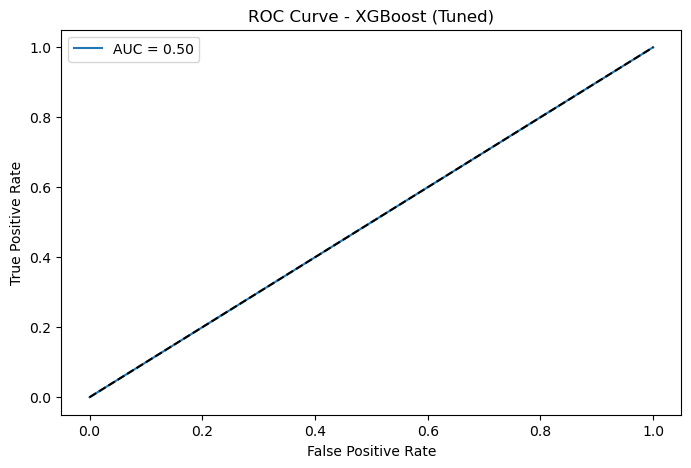

In [37]:
y_prob_xgb = xgb_grid.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_xgb)

plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob_xgb):.2f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost (Tuned)")
plt.legend()
plt.show()